In [2]:
import geopandas as gpd
import pandas as pd
from tqdm import trange,tqdm
from shapely.geometry import Point,box
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
os.chdir(r'D:\Dataset_and_Demo\ICESat-2')
SETP_SHP = r'SETP_Boundary.geojson'
GL_ATL03_SHP = r'GL_ATL03.shp'
SETP_DOM = gpd.read_file(SETP_SHP)
GL_ATL03 = gpd.read_file(GL_ATL03_SHP)

In [4]:
GL_ATL03['index_righ'].unique()

array([5566, 5522, 5464, 5460, 5429, 5571, 5470, 5472, 5433, 2817, 5504,
       1153, 1179, 1175, 4182, 1551, 2701,  206, 4094, 1267,   58,   62,
       4575, 4576, 1597, 1357, 1359, 1432, 5124, 5220, 5222, 1434,   66,
       1444, 5120, 5205], dtype=int64)

In [9]:
GL_ATL03.head()

,Unnamed_ 0,time,lat,lon,dist_ph_al,height,quality_ph,signal_con,signal_c_1,signal_c_2,signal_c_3,signal_c_4,subgroup,index_righ,DN,Times,Shape_Leng,Shape_Area,geometry
0,3914166,1.578802e+08,29.770010,94.608589,15.680449,2267.9250,0,-1,-1,-1,-1,-1,gt1l/,5566,0,None,0.107035,0.00018,POINT (94.60859 29.77001)
1,3914195,1.578802e+08,29.770015,94.608593,16.212730,2346.2239,0,-1,-1,-1,-1,-1,gt1l/,5566,0,None,0.107035,0.00018,POINT (94.60859 29.77002)
2,3914198,1.578802e+08,29.770015,94.608591,16.273382,2319.5390,0,-1,-1,-1,-1,-1,gt1l/,5566,0,None,0.107035,0.00018,POINT (94.60859 29.77002)
3,3914199,1.578802e+08,29.770016,94.608588,16.387460,2269.1430,0,-1,-1,-1,-1,-1,gt1l/,5566,0,None,0.107035,0.00018,POINT (94.60859 29.77002)
4,3914236,1.578802e+08,29.770021,94.608593,16.907042,2353.0552,0,-1,-1,-1,-1,-1,gt1l/,5566,0,None,0.107035,0.00018,POINT (94.60859 29.77002)


In [15]:
GL_ATL03[(GL_ATL03['index_righ'] == 1434) & (GL_ATL03['subgroup'] == 'gt3l/')]


,Unnamed_ 0,time,lat,lon,dist_ph_al,height,quality_ph,signal_con,signal_c_1,signal_c_2,signal_c_3,signal_c_4,subgroup,index_righ,DN,Times,Shape_Leng,Shape_Area,geometry
913904,168088918,1.585704e+08,29.762248,93.115856,8.923759,5665.5420,0,0,-1,-1,0,0,gt3l/,1434,255,2023-05-31_to_2023-09-15,0.019618,0.000016,POINT (93.11586 29.76225)
913905,168088982,1.585704e+08,29.762254,93.115855,9.594202,5680.4355,0,0,-1,-1,0,0,gt3l/,1434,255,2023-05-31_to_2023-09-15,0.019618,0.000016,POINT (93.11585 29.76225)
913906,168088983,1.585704e+08,29.762254,93.115856,9.655352,5659.2407,0,0,-1,-1,0,0,gt3l/,1434,255,2023-05-31_to_2023-09-15,0.019618,0.000016,POINT (93.11586 29.76225)
913907,168089055,1.585704e+08,29.762260,93.115854,10.322203,5675.5070,0,0,-1,-1,0,0,gt3l/,1434,255,2023-05-31_to_2023-09-15,0.019618,0.000016,POINT (93.11585 29.76226)
913908,168089056,1.585704e+08,29.762260,93.115854,10.308608,5680.1636,0,0,-1,-1,0,0,gt3l/,1434,255,2023-05-31_to_2023-09-15,0.019618,0.000016,POINT (93.11585 29.76226)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949612,168126000,1.585704e+08,29.766903,93.115328,6.151305,6247.8040,0,-1,-1,-1,-1,-1,gt3l/,1434,255,2023-05-31_to_2023-09-15,0.019618,0.000016,POINT (93.11533 29.7669)
949613,168126001,1.585704e+08,29.766904,93.115329,6.220495,6223.7017,0,-1,-1,-1,-1,-1,gt3l/,1434,255,2023-05-31_to_2023-09-15,0.019618,0.000016,POINT (93.11533 29.7669)
949614,168126002,1.585704e+08,29.766905,93.115330,6.275063,6204.9336,0,-1,-1,-1,-1,-1,gt3l/,1434,255,2023-05-31_to_2023-09-15,0.019618,0.000016,POINT (93.11533 29.7669)
949615,168126003,1.585704e+08,29.766905,93.115330,6.267575,6207.4170,0,-1,-1,-1,-1,-1,gt3l/,1434,255,2023-05-31_to_2023-09-15,0.019618,0.000016,POINT (93.11533 29.7669)


In [19]:
GL_ATL03['quality_ph'].max()

3

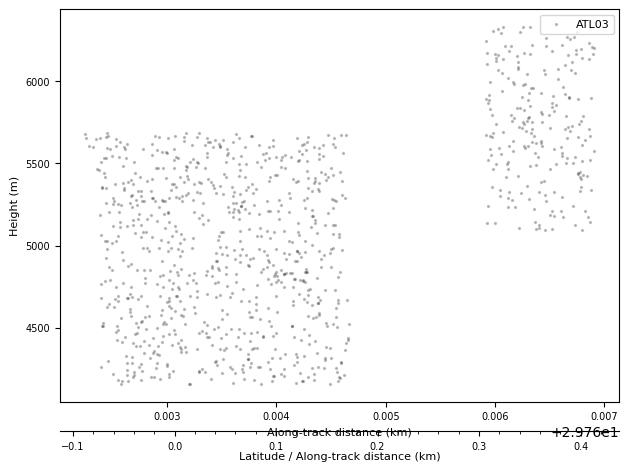

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

filtered_data = GL_ATL03[(GL_ATL03['index_righ'] == 1434) & (GL_ATL03['subgroup'] == 'gt3l/')].sample(1000)

# 提取 lat, lon, height 和 xatc 数据
lat = filtered_data['lat']
lon = filtered_data['lon']
height = filtered_data['height']
xatc = filtered_data['dist_ph_al']  # 假设 xatc 是沿轨迹距离

# 创建绘图
fig, ax = plt.subplots()

# 绘制 ICESat-2 数据
sc = ax.scatter(lat, height, s=2, color='black', alpha=0.2, label='ATL03')

# 调整字体大小
ax.tick_params(labelsize=7)
ax.yaxis.label.set_size(8)
ax.set_xlabel('Along-track distance (km)', fontsize=8)
ax.set_ylabel('Height (m)', fontsize=8)
ax.legend(loc='upper right', fontsize=8)

# 如果轨迹是降序的，则翻转 x 轴
if lat.iloc[0] > lat.iloc[-1]:
    ax.set_xlim(np.flip(np.array(ax.get_xlim())))

# 添加沿轨迹距离的次坐标轴
lx = filtered_data.sort_values(by='dist_ph_al').iloc[[0, -1]][['dist_ph_al', 'lat']].reset_index(drop=True)
lat = np.array(lx['lat'])
xatc = np.array(lx['dist_ph_al']) / 1e3  # 假设 xatc 是以米为单位，转换为千米

def lat2xatc(l):
    return xatc[0] + (l - lat[0]) * (xatc[1] - xatc[0]) / (lat[1] - lat[0])

def xatc2lat(x):
    return lat[0] + (x - xatc[0]) * (lat[1] - lat[0]) / (xatc[1] - xatc[0])

secax = ax.secondary_xaxis(-0.075, functions=(lat2xatc, xatc2lat))
secax.xaxis.set_minor_locator(AutoMinorLocator())
secax.set_xlabel('Latitude / Along-track distance (km)', fontsize=8, labelpad=0)
secax.tick_params(axis='both', which='major', labelsize=7)
secax.ticklabel_format(useOffset=False)  # 显示实际可读的纬度值

fig.tight_layout()

plot_filename = 'icesat2_plot.png'
plt.show()
# fig.savefig(plot_filename, dpi=600)
# print('--> Saved plot as %s.' % plot_filename)

In [53]:
filtered_data['signal_c_4'].max()

0

In [43]:
import warnings
import pandas as pd
import numpy as np


def read_hdf5_atl03_beam_pandas(filename, beam):
    # 打开HDF5文件进行读取
    h5_store = pd.HDFStore(filename, mode='r')
    root = h5_store.root
    # 为ICESat-2 ATL03变量和属性分配python字典
    atl03_mds = {}

    # 读取文件中每个输入光束
    # beams = [k for k in file_id.keys() if bool(re.match('gt\\d[lr]', k))]
    beams = ['gt1l', 'gt1r', 'gt2l', 'gt2r', 'gt3l', 'gt3r']
    if beam not in beams:
        print('请填入正确的光束代码')
        return

    atl03_mds['heights'] = {}
    atl03_mds['geolocation'] = {}

    # -- 获取每个HDF5变量
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # -- ICESat-2 Heights Group
        heights_keys = ['dist_ph_across', 'dist_ph_along', 'h_ph', 'lat_ph', 'lon_ph', 'signal_conf_ph']
        for key in heights_keys:
            atl03_mds['heights'][key] = root[beam]['heights'][key][:]

        geolocation_keys = ['ref_elev', 'ph_index_beg', 'segment_id', 'segment_ph_cnt', 'segment_dist_x', 'segment_length']
        # -- ICESat-2 Geolocation Group
        for key in geolocation_keys:
            atl03_mds['geolocation'][key] = root[beam]['geolocation'][key][:]

    h5_store.close()
    return atl03_mds

def get_atl03_x_atc(atl03_mds):
    val = atl03_mds

    # 初始化
    val['heights']['x_atc'] = np.zeros_like(val['heights']['h_ph']) + np.NaN
    val['heights']['y_atc'] = np.zeros_like(val['heights']['h_ph']) + np.NaN
    val['geolocation']['ref_elev_all'] = np.zeros_like(val['heights']['h_ph'])

    # -- ATL03 Segment ID
    segment_id = val['geolocation']['segment_id']
    # -- 分段中的第一个光子（转换为基于0的索引）
    segment_index_begin = val['geolocation']['ph_index_beg'] - 1
    # -- 分段中的光子事件数
    segment_pe_count = val['geolocation']['segment_ph_cnt']
    # -- 每个ATL03段的沿轨道距离
    segment_distance = val['geolocation']['segment_dist_x']

    # -- 对ATL03段进行迭代，以计算40m的平均值
    # -- 在ATL03中基于1的索引：无效==0
    # -- 此处为基于0的索引：无效==-1
    segment_indices, = np.nonzero((segment_index_begin[:-1] >= 0) &
                                  (segment_index_begin[1:] >= 0))
    for j in segment_indices:
        # -- j 段索引
        idx = segment_index_begin[j]
        # -- 分段中的光子数（使用2个ATL03分段）
        c1 = np.copy(segment_pe_count[j])
        c2 = np.copy(segment_pe_count[j + 1])
        cnt = c1 + c2

        # -- 沿轨道和跨轨道距离
        # -- 获取当前段光子列表，idx当前段(j)第一个光子数量，c1当前段光子数量，idx+c1当前段长度
        distance_along_x = np.copy(val['heights']['dist_ph_along'][idx: idx + cnt])
        ref_elev = np.copy(val['geolocation']['ref_elev'][j])
        # -- 给当前段的光子加上当前段沿轨道距离
        distance_along_x[:c1] += segment_distance[j]
        distance_along_x[c1:] += segment_distance[j + 1]
        distance_along_y = np.copy(val['heights']['dist_ph_across'][idx: idx + cnt])

        val['heights']['x_atc'][idx: idx + cnt] = distance_along_x
        val['heights']['y_atc'][idx: idx + cnt] = distance_along_y
        val['geolocation']['ref_elev_all'][idx: idx + c1] += ref_elev

In [39]:
val = read_hdf5_atl03_beam_pandas(r"D:\Dataset_and_Demo\ICESat-2\2023_ATL03_3\processed_ATL03_20230110071941_03171802_006_02.h5", 'gt1l')

In [56]:
val['heights']['signal_conf_ph']

array([[ 0, -1, -1,  0,  0],
       [ 0, -1, -1,  0,  0],
       [ 0, -1, -1,  0,  0],
       ...,
       [ 0, -1, -1,  0,  0],
       [ 0, -1, -1,  0,  0],
       [ 0, -1, -1,  0,  0]], dtype=int8)

array([1.5620685, 1.5620685, 1.5620685, ..., 0.       , 0.       ,
       0.       ], dtype=float32)